
NSL_KDD 主程式
python 3.5
Author:daniel-code
Date:2018.04.11


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time


In [ ]:
# read kdd date from csv


data = pd.read_csv('NSL_KDD/KDDTrain+.csv', header=None)

# build attack table
attack_type = pd.read_csv('NSL_KDD/Attack Types.csv', names=['attack', 'type'])
attack_type_dict = attack_type.set_index('attack')['type'].to_dict()

# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x])
x = data.drop(columns=[1, 2, 3, 41])
print(x)
# statistics attack type
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type')
plt.bar(sorted_hist_list[:, 0], sorted_hist_list[:, 1])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()
x_train = np.array(x)
y_train = np.array(y)
# splite dataset into train and test set
#x_train, x_test, y_train, y_test = train_test_split(x[:, 4:], y, test_size=0.2, random_state=0)

In [ ]:
data = pd.read_csv('NSL_KDD/KDDTest+.csv', header=None)

# build attack table
#attack_type = pd.read_csv('NSL_KDD/Attack Types.csv', names=['attack', 'type'])
#attack_type_dict = attack_type.set_index('attack')['type'].to_dict()

# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x])
x = data.drop(columns=[1, 2, 3, 41])
x_test = np.array(x)
y_test = np.array(y)

In [8]:
# build model
model = svm.SVC()
print('---START TRAINING---')
start_time = time.time()
model.fit(X=x_train, y=y_train)
print('---END TRAIN---')
print('Time = ', time.time() - start_time)

---START TRAINING---


---END TRAIN---
Time =  3792.0631110668182


             precision    recall  f1-score   support

        dos       0.99      0.99      0.99      9166
     normal       0.99      0.99      0.99     13457
      probe       0.97      0.96      0.97      2342
        r2l       0.93      0.92      0.93       215
        u2r       1.00      0.33      0.50        15

avg / total       0.99      0.99      0.99     25195



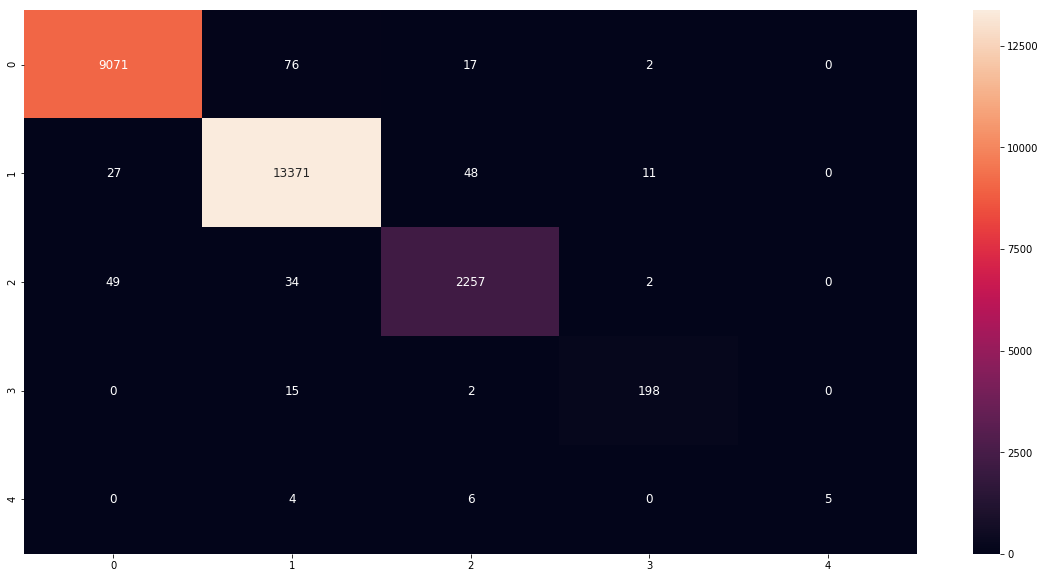

In [19]:
import seaborn as sns

# predict
y_pred=model.predict(x_test)
score = model.score(X=x_test, y=y_test)
print(classification_report(y_test,y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,annot_kws={"size": 12}, ax = ax,fmt="d") #annot=True to annotate cells
plt.show()